In [17]:
import pyfits
import numpy as np 

# Load the 3FGL catalog 
# This can be downloaded from http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v16.fit
fgl = pyfits.open('/data/gll_psc_v16.fit')
fgl.info()

Filename: /data/gll_psc_v16.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      11   ()              
1    LAT_Point_Source_Catalog  BinTableHDU    463   3034R x 77C   [18A, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, 16A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, E, E, E, D, E, 48E, 96E, 18A, 17A, 18A, 18A, 18A, 15A, 14A, 15A, A, 21A, 5A, 26A, 26A, I]   
2    ROIs        BinTableHDU    108   840R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
3    Hist_Start  BinTableHDU     43   49R x 1C     [D]   
4    GTI         BinTableHDU    126   22858R x 2C   [D, D]   
5    ExtendedSources  BinTableHDU     74   25R x 11C    [15A, 18A, E, E, E, E, 14A, E, E, E, 18A]   


In [18]:
# Print the keys for each field.  We care mostly about the positions at the moment. 
print fgl[1].header.items

<bound method Header.items of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1082 / length of dimension 1                          
NAXIS2  =                 3034 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   77 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                        

Populating the interactive namespace from numpy and matplotlib


(25, -25)

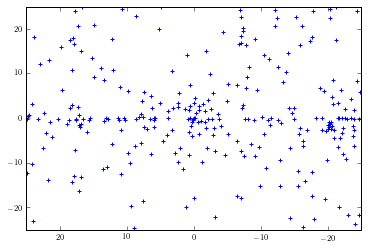

In [19]:
lats = fgl[1].data['GLAT']
lons = fgl[1].data['GLON']
names= fgl[1].data['Source_Name']

# Get list of all 3fgl sources in |l|<25 |b| < 25 
lons[lons>180] -= 360
idx = np.where((np.abs(lats)<25) & (np.abs(lons)<25))[0] # list of indices for sources in the ROI

%pylab inline 
# Plot them 
plt.scatter(lons[idx], lats[idx], marker='+')
plt.ylim(-25,25)
plt.xlim(25,-25)

In [20]:
counts = np.load('../output/cartesian_count_map_0.1deg.npy')
counts.shape

(6, 400, 400)

-c:3: RuntimeWarning: divide by zero encountered in log10


(-20, 20)

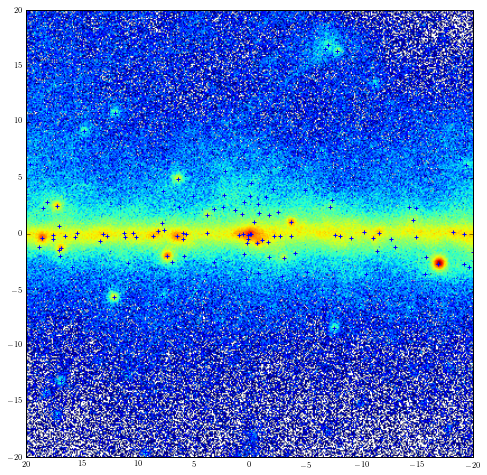

In [27]:
plt.figure(figsize=(8,8))
#print counts
plt.imshow(np.log10(counts[0]), origin='lower', extent=[-20,20,-20,20])
plt.scatter(lons[idx], lats[idx], marker='+')
plt.xlim(20,-20)
plt.ylim(-20,20)